In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/home/clay/research/kaggle/sennet/data_dumps/wandb_export_2023-12-30T20_53_44.470+00_00.csv")
df = df[df["best_surface_dice"] > 0.5]
df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,apparent_batch_size,augmentation.augmenter_class,...,val_folders,crude_f1,crude_val_loss,epoch,f1_score,lr-AdamW,surface_dice,threshold,train_loss,trainer/global_step
1,SMP_Unet_resnet18_imagenet-c960x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-30T16:54:08.000Z,9483,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,3,0.887407,0.001,0.827977,0.10,0.329878,6839
2,SMP_Unet_resnet18_imagenet-c704x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-30T12:38:00.000Z,15365,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,1,0.914977,0.001,0.853409,0.02,0.117410,17058
3,SMP_Unet_resnet18_imagenet-c224x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-30T11:22:20.000Z,4537,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,0,0.777525,0.001,0.753228,0.50,0.109328,9374
4,SMP_Unet_resnet18_imagenet-c832x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-30T07:27:04.000Z,14109,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,1,0.900707,0.001,0.837489,0.02,0.031702,12551
5,SMP_Unet_resnet18_imagenet-c672x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-30T05:19:55.000Z,7627,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,0,0.891789,0.001,0.793554,0.20,0.019222,9374
6,SMP_Unet_resnet18_imagenet-c800x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-29T19:43:43.000Z,34569,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,4,0.909799,0.001,0.845078,0.05,0.169580,34319
7,SMP_Unet_resnet18_imagenet-c672x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-29T15:49:22.000Z,14058,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,1,0.894551,0.001,0.836324,0.05,0.031728,20030
8,SMP_Unet_resnet18_imagenet-c288x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-29T14:26:50.000Z,4949,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,0,0.899585,0.001,0.832469,0.50,0.192064,12499
9,SMP_Unet_resnet18_imagenet-c128x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-29T12:02:24.000Z,8660,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,0,0.840772,0.001,0.758714,0.02,0.491214,17499
10,SMP_Unet_resnet18_imagenet-c256x1-bs32-llr-3-t...,finished,-,ssumoo,NaN,2023-12-29T10:56:24.000Z,3946,NaN,2,VanillaAugmentation,...,"[""kidney_3_dense""]",0.0,0.0,0,0.894411,0.001,0.819140,0.10,0.225442,9999


In [9]:
import json


weights0 = []
weights1 = []
weights2 = []
weights3 = []
for _, row in df["loss"].items():
    data = json.loads(row)
    w0 = data[0]["weight"]
    w1 = data[1]["weight"]
    w2 = data[2]["weight"]
    w3 = data[3]["weight"]
    total_weight = w0 + w1 + w2 + w3
    weights0.append(w0 / total_weight)
    weights1.append(w1 / total_weight)
    weights2.append(w2 / total_weight)
    weights3.append(w3 / total_weight)


df["weights0"] = weights0
df["weights1"] = weights1
df["weights2"] = weights2
df["weights3"] = weights3

In [10]:
for c in df.columns:
    print(c)

Name
State
Notes
User
Tags
Created
Runtime
Sweep
apparent_batch_size
augmentation.augmenter_class
batch_size
batch_transform.kwargs.alpha_cutmix
batch_transform.kwargs.alpha_mixup
batch_transform.kwargs.cutmix_prob
batch_transform.kwargs.mixup_prob
best_surface_dice
dataset.kwargs.add_depth_along_channel
dataset.kwargs.add_depth_along_height
dataset.kwargs.add_depth_along_width
dataset.kwargs.assert_label_exists
dataset.kwargs.channel_start
dataset.kwargs.crop_location_noise
dataset.kwargs.crop_size
dataset.kwargs.crop_size_range
dataset.kwargs.load_ann
dataset.kwargs.n_take_channels
dataset.kwargs.normalisation_kwargs.mean
dataset.kwargs.normalisation_kwargs.normalisation_percentile
dataset.kwargs.normalisation_kwargs.normalise_by_mean_and_std
dataset.kwargs.normalisation_kwargs.std
dataset.kwargs.p_crop_location_noise
dataset.kwargs.p_crop_size_keep_ar
dataset.kwargs.p_crop_size_noise
dataset.kwargs.reduce_zero_label
dataset.kwargs.sample_with_mask
dataset.kwargs.seg_fill_val
dataset

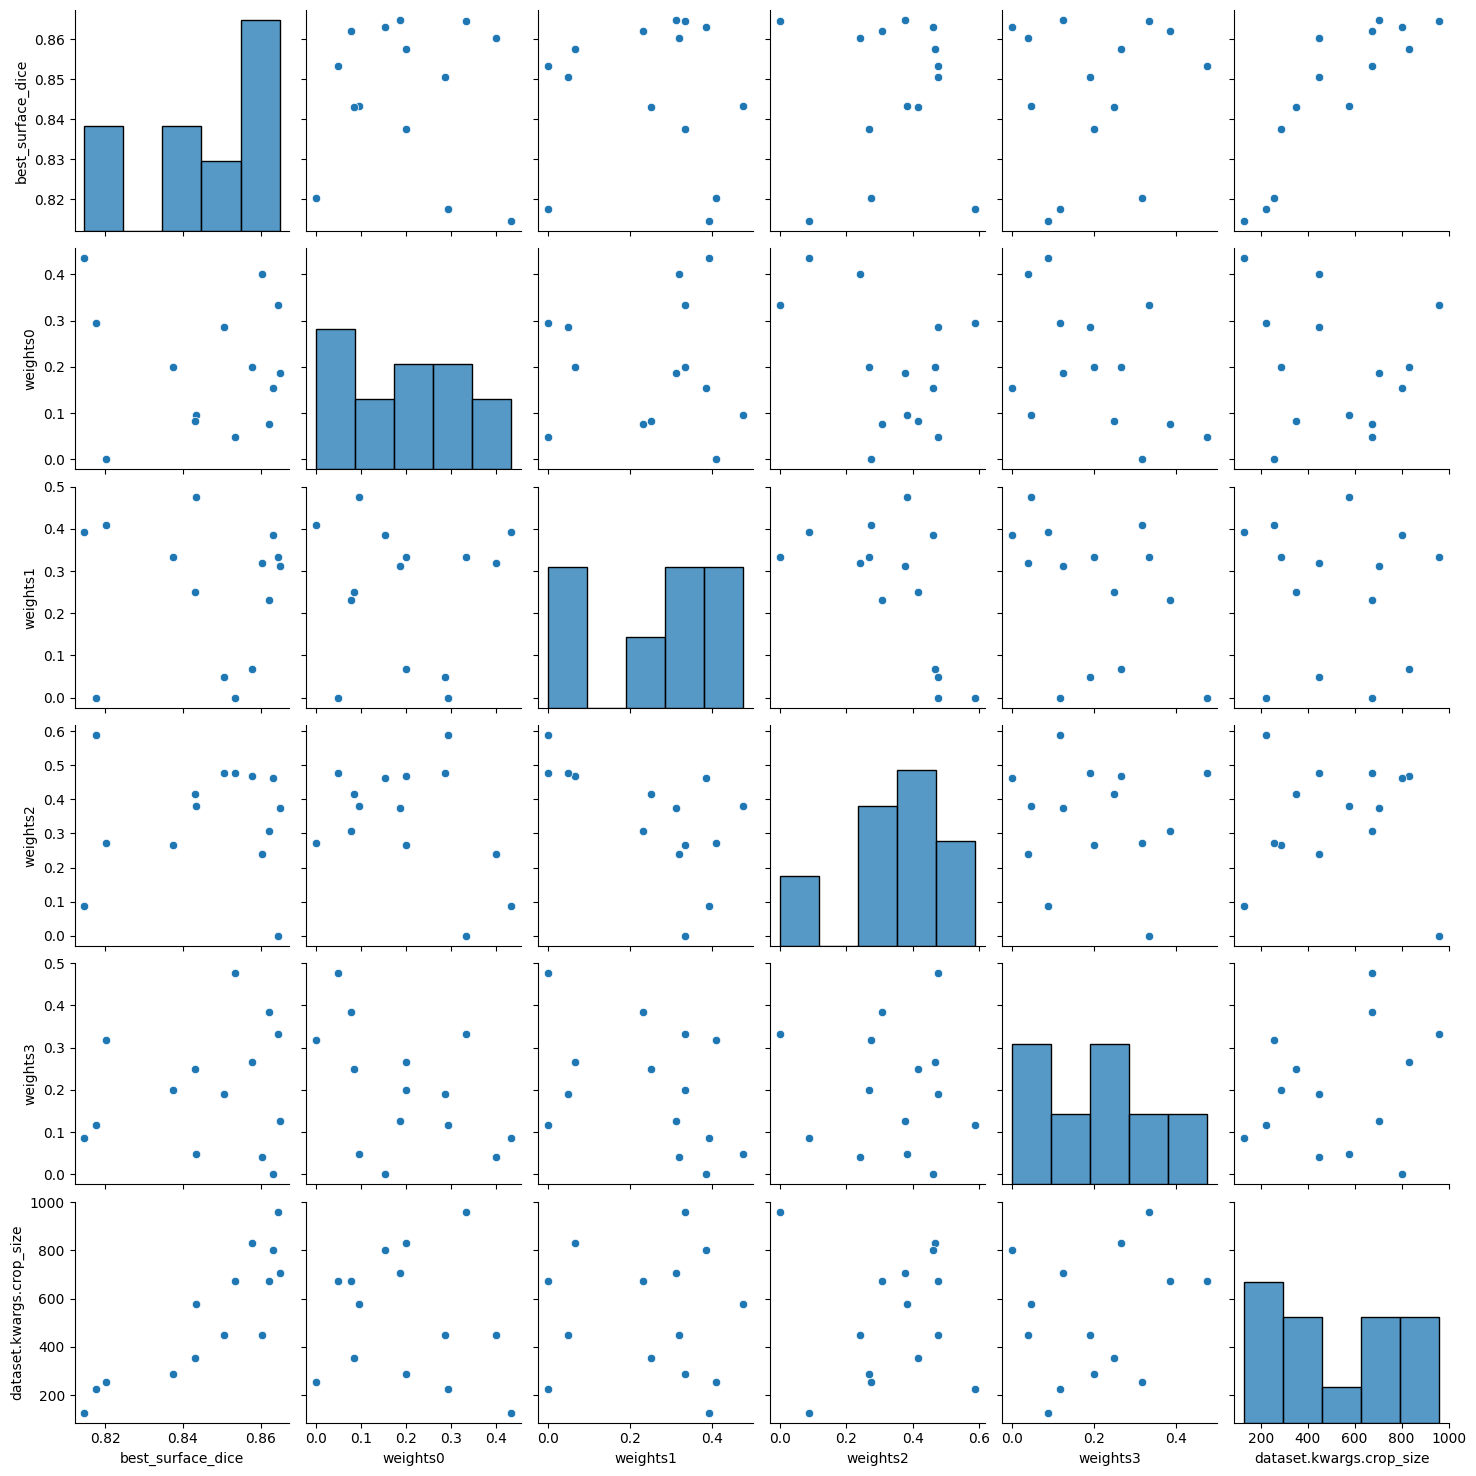

In [12]:
sns.pairplot(
    df[["best_surface_dice", "weights0", "weights1", "weights2", "weights3", "dataset.kwargs.crop_size"]],
)

In [13]:
df["dataset.kwargs.crop_size"].max()

960